In [1]:
import os
os.listdir('../input/')

['pickled-glove840b300d-for-10sec-loading', 'innoplexusav']

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
from collections import OrderedDict
from tqdm import tqdm_notebook as tqdm
import pickle

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer


warnings.filterwarnings('ignore')
sbn.set(style='white')

In [3]:
train_data = pd.read_csv('../input/innoplexusav/train.csv')
test_data = pd.read_csv('../input/innoplexusav/test.csv')

In [4]:
train_data.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


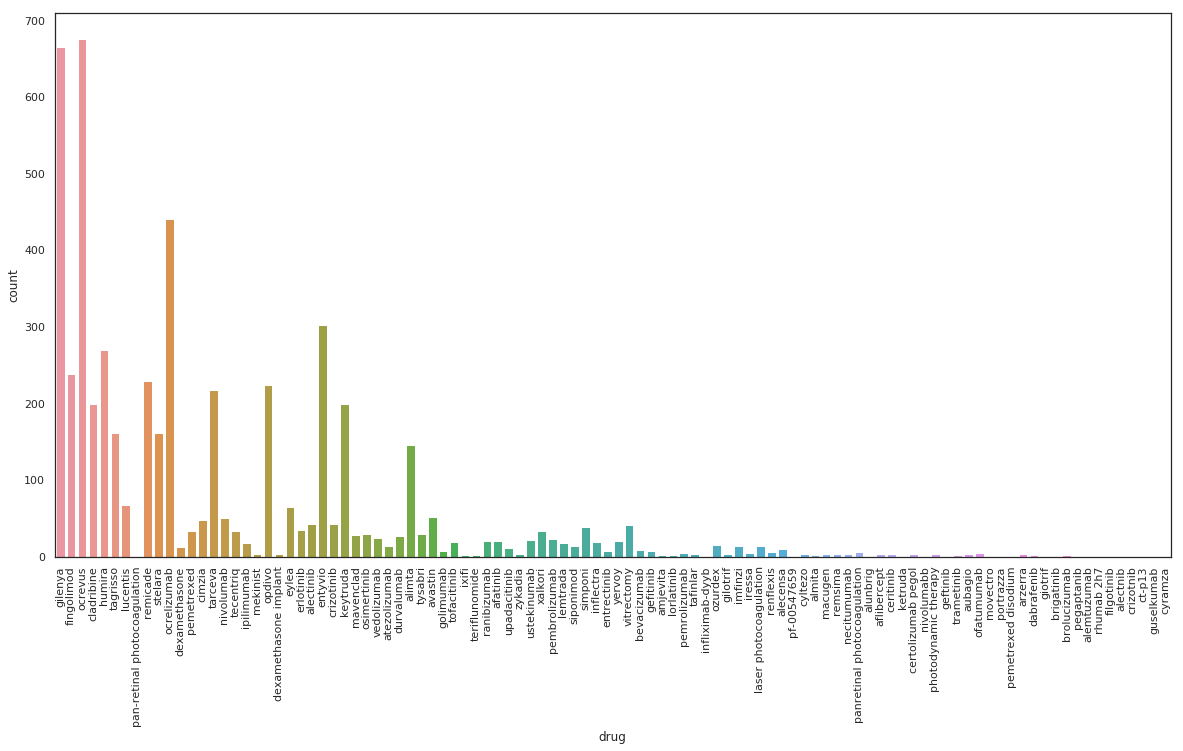

In [5]:
plt.figure(figsize=(20,10))
sbn.countplot(x='drug', data=train_data)
plt.xticks(rotation=90)
plt.show()

In [6]:
train_data.isna().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [7]:
test_data.isna().sum()

unique_hash    0
text           0
drug           0
dtype: int64

In [8]:
# def create_bag_of_words(texts):
#     bag_of_words = {}
#     for text in tqdm(texts):
#         words = text.split()
#         for word in words:
#             try:
#                 bag_of_words[word] += 1
#             except KeyError:
#                 bag_of_words[word] = 1
#     bag_of_words = OrderedDict(sorted(bag_of_words.items(), reverse=True, key=lambda x: x[1]))
#     return bag_of_words

In [9]:
# all_comments = train_data['text'].tolist()
# all_comments.extend(test_data['text'].tolist())
# vocabulary = create_bag_of_words(all_comments)

In [10]:
# print({k: vocabulary[k] for k in list(vocabulary)[:5]})

In [11]:
x = train_data['text']
y = train_data['sentiment']
x_pred = test_data['text']

vector = CountVectorizer().fit(x)
x = vector.transform(x)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

model = MultinomialNB(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
score = f1_score(y_val, y_pred, average='micro')
print(score)

0.4564393939393939


In [12]:
x = train_data['text']
y = train_data['sentiment']
x_pred = test_data['text']

vector = CountVectorizer().fit(x)
x = vector.transform(x)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(x_train.toarray(), y_train)
y_pred = model.predict(x_val.toarray())
score = f1_score(y_val, y_pred, average='micro')
print(score)

0.646780303030303


In [13]:
model = GaussianNB()
model.fit(x.toarray(), y)
x_pred = vector.transform(x_pred)
y_pred = model.predict(x_pred.toarray())

In [14]:
sample = pd.read_csv('../input/innoplexusav/sample.csv')
sample['sentiment'] = y_pred
sample.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,1
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [15]:
sample.to_csv('baseline-naive-bayes.csv', index=False)